In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [43]:
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')

In [44]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [46]:
missing_values = df.isnull().sum()#проверка наличия пропущенных значений
print(missing_values)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


В датасете есть пропуски в столбцах 'artists', 'album_name' и 'track_name'. возможно пока не критичны, в будущем если что заполню их

Сейчас мне нужно преобразовать категориальные признаки в числовые значения для последующего анализа и построения моделей. буду использовать Label Encoding 


In [47]:
categorical_columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


In [48]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))

Категориальные признаки преобразованы в числовые.


In [49]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,62846,10357,8100,11741,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,1,55668,3287,14796,22528,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,3,77942,14839,8580,9580,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,4,68242,5255,16899,25689,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


**Анализ корреляции между числовыми признаками**

Цель — построить матрицу корреляции, чтобы выявить взаимосвязи между признаками и определить избыточные признаки.


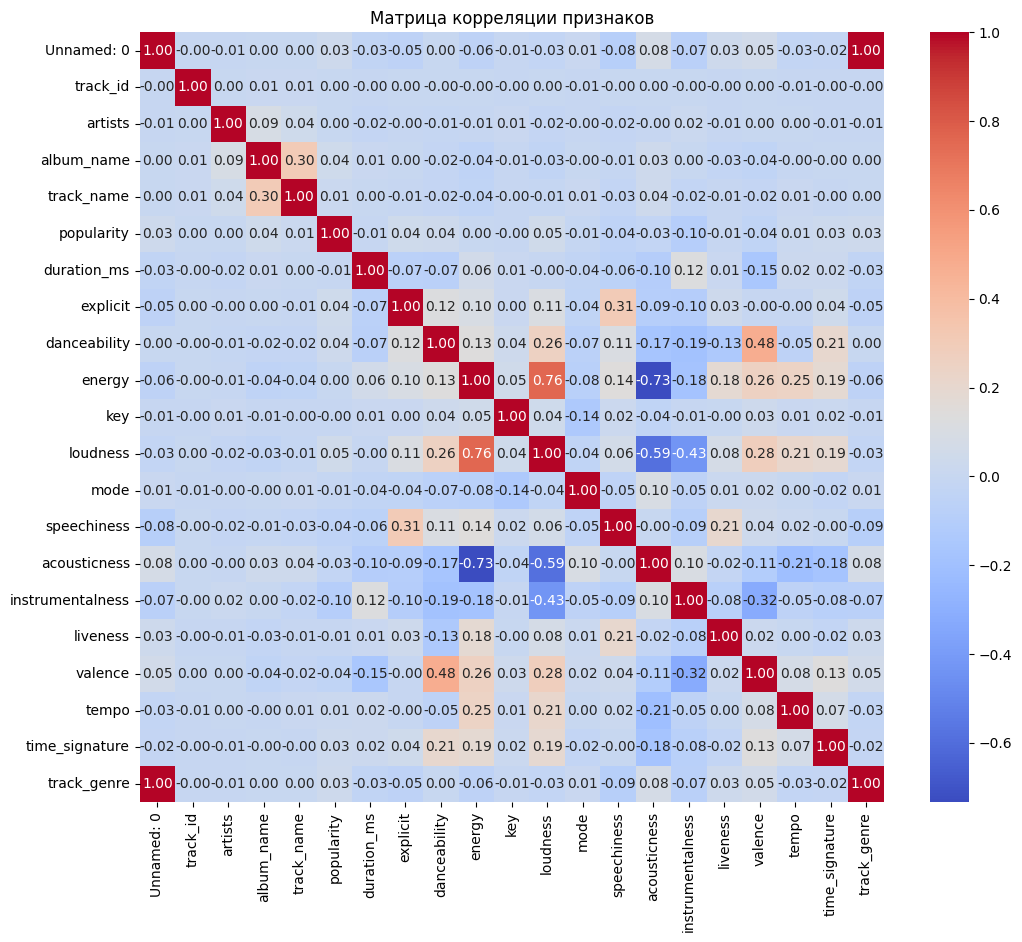

In [50]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции признаков')
plt.show()

Матрица корреляции выявила сильную связь между признаками 'energy' и 'loudness', что можно учитывать при создании новых признаков или удалении избыточных данных.

**Графики EDA**

хочу исследовать распределение популярности песен, чтобы понять, как часто встречаются треки с разной популярностью.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


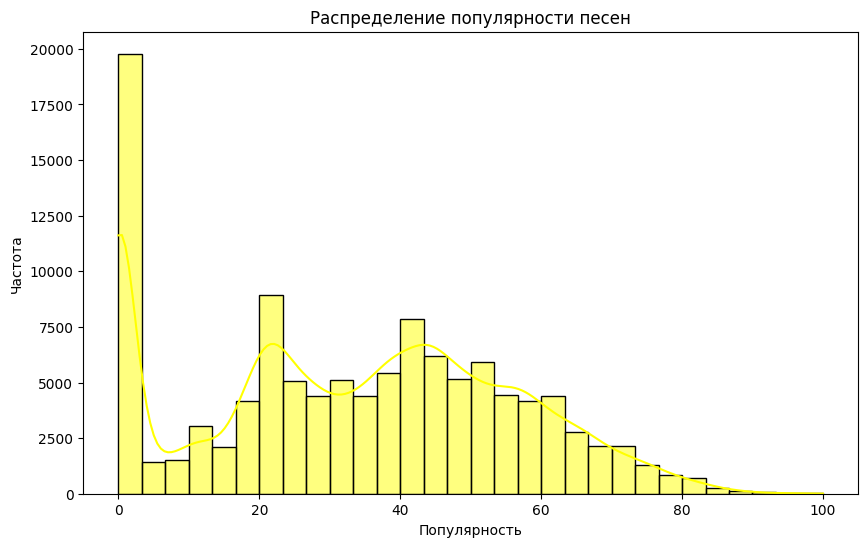

In [51]:
# График распределения популярности песен
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='yellow')
plt.title('Распределение популярности песен')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

Популярность песен с значением 0 встречается наиболее часто, с частотой почти 20,000.

/tmp/ipykernel_24/3012407315.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['danceability'], shade=True, color='red')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


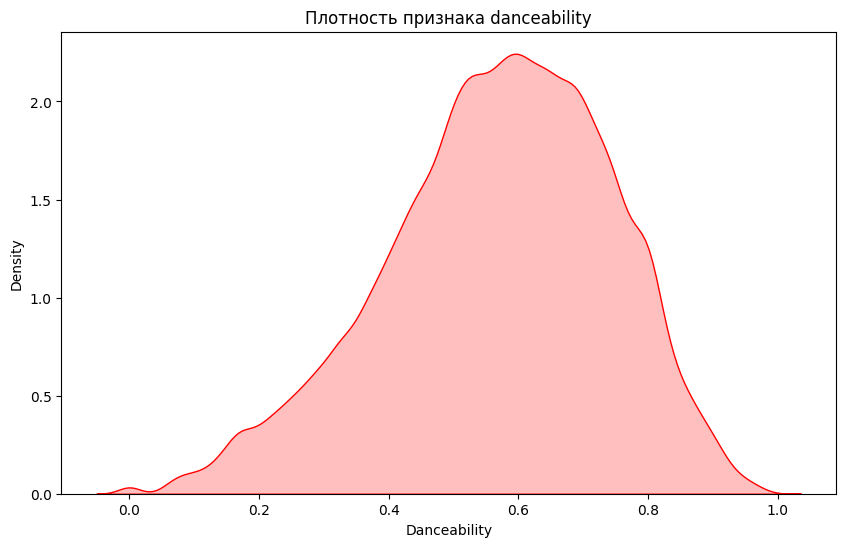

In [52]:
# Плотность признака danceability
plt.figure(figsize=(10, 6))
sns.kdeplot(df['danceability'], shade=True, color='red')
plt.title('Плотность признака danceability')
plt.xlabel('Danceability')
plt.show()

хочу посмотреть, как распределяется длительность треков в миллисекундах

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


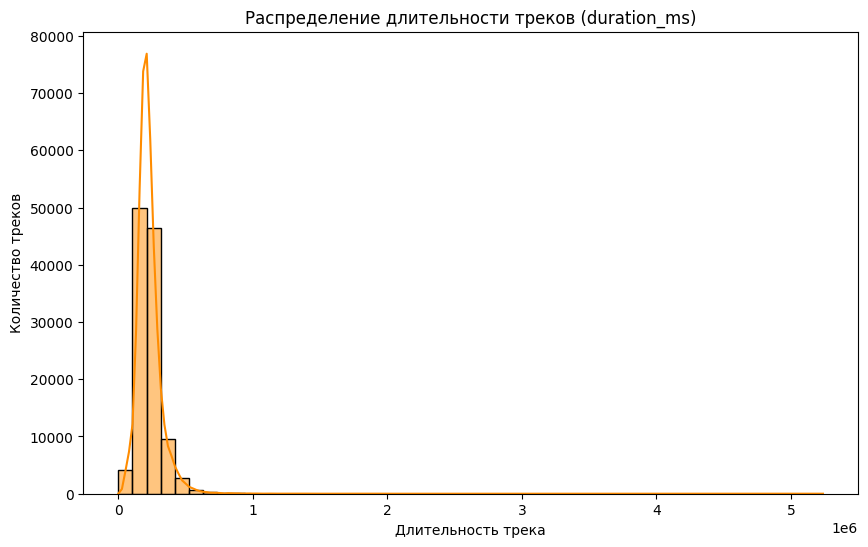

In [53]:
# **1. Распределение признака duration_ms**
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'], bins=50, kde=True, color='darkorange')
plt.title('Распределение длительности треков (duration_ms)')
plt.xlabel('Длительность трека')
plt.ylabel('Количество треков')
plt.show()

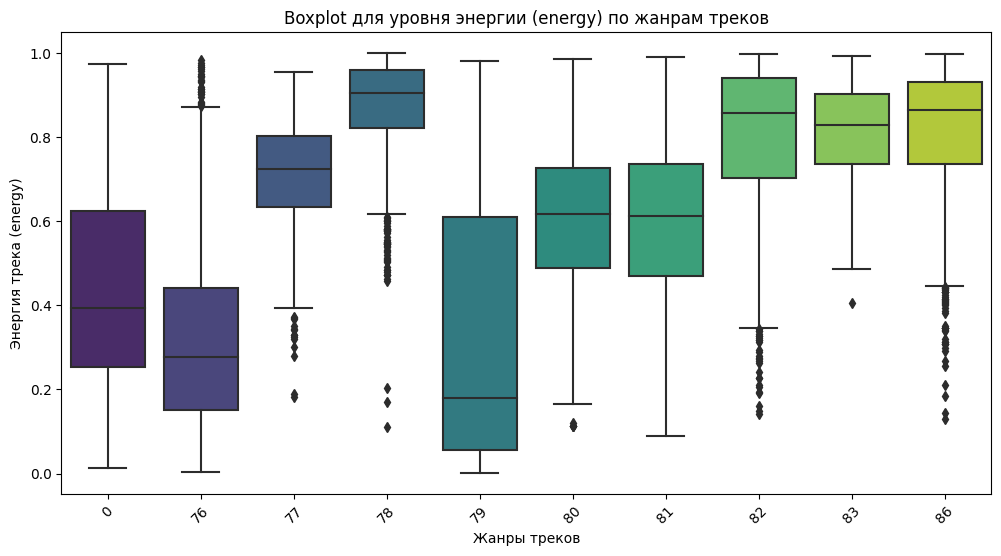

In [54]:
# Boxplot для energy по жанрам треков (track_genre)
top_10_genres = df['track_genre'].value_counts().head(10).index  # Ограничимся топ-10 жанрами
filtered_df = df[df['track_genre'].isin(top_10_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='energy', data=filtered_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Boxplot для уровня энергии (energy) по жанрам треков')
plt.xlabel('Жанры треков')
plt.ylabel('Энергия трека (energy)')
plt.show()

**Итог:** Видно, что энергия треков заметно различается в зависимости от жанра. Некоторые жанры имеют более широкий разброс, что может быть важно при дальнейшем анализе. 


**Цель:** Посмотреть, как распределяется темп треков

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


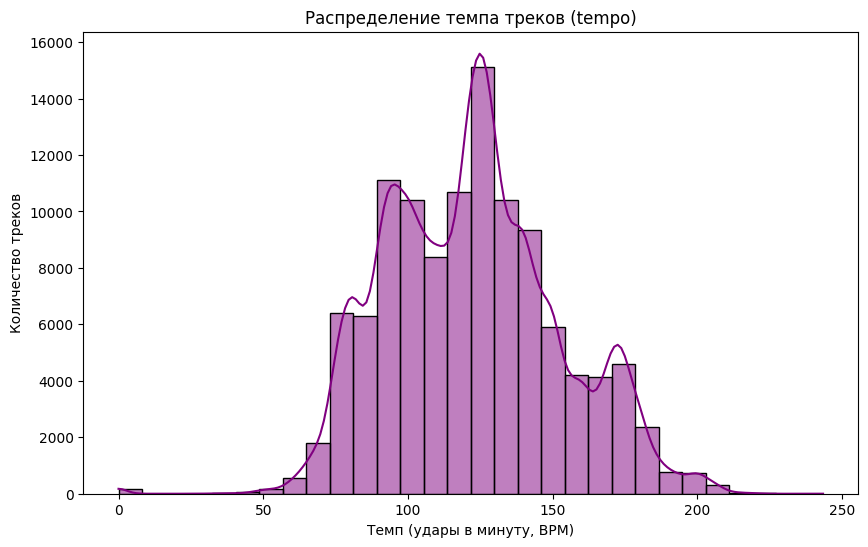

In [55]:
# Распределение признака tempo**
plt.figure(figsize=(10, 6))
sns.histplot(df['tempo'], bins=30, kde=True, color='purple')
plt.title('Распределение темпа треков (tempo)')
plt.xlabel('Темп (удары в минуту, BPM)')
plt.ylabel('Количество треков')
plt.show()

**Итог:** Большинство треков имеют темп в диапазоне от 90 до 150 ударов в минуту (BPM). Этот диапазон соответствует среднему темпу популярной музыки. 


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable 

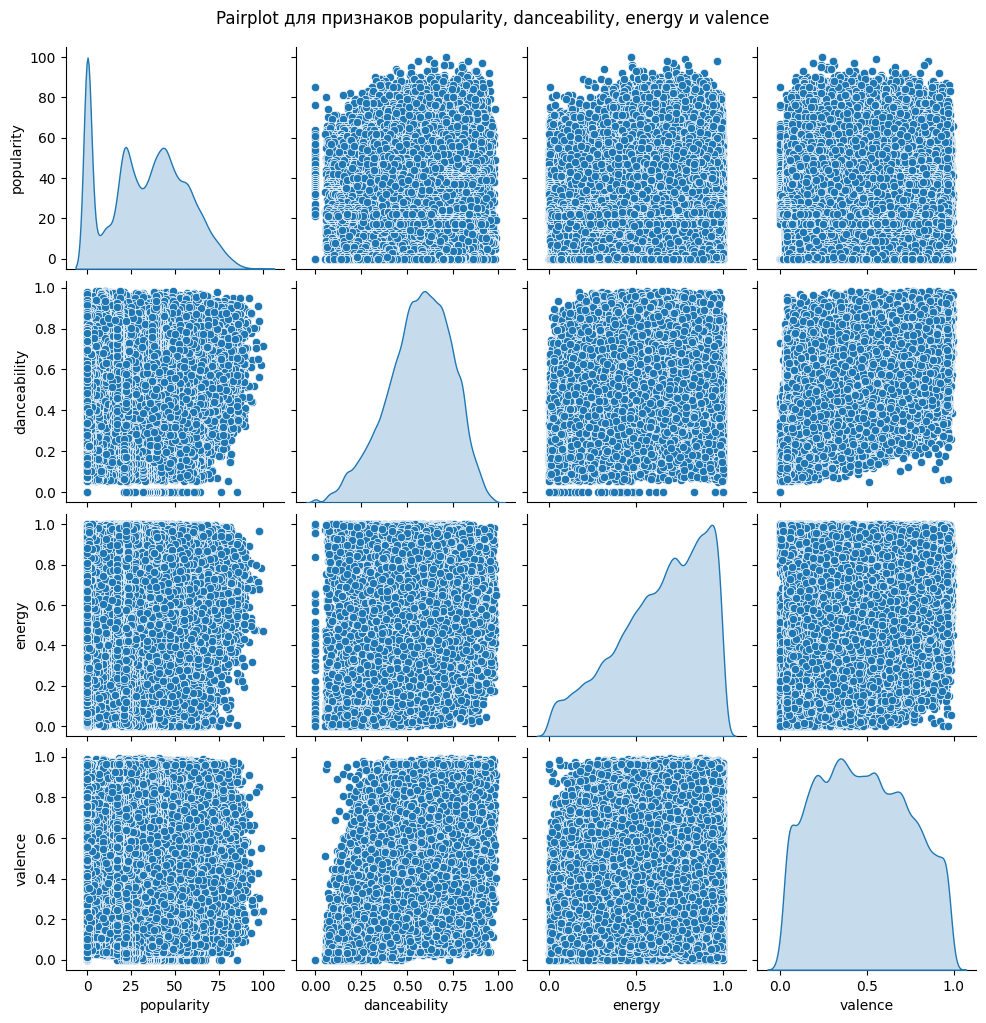

In [56]:
# **5. Pairplot для признаков popularity, danceability, energy, valence**
# **Цель:** Визуализировать взаимосвязь между популярностью трека, танцевальностью, энергией и настроением (valence)
selected_columns = ['popularity', 'danceability', 'energy', 'valence']
sns.pairplot(df[selected_columns], kind='scatter', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot для признаков popularity, danceability, energy и valence', y=1.02)
plt.show()


**Итог:** Pairplot позволяет выявить интересные взаимосвязи между популярностью трека и признаками danceability, energy и valence. Видны линейные и нелинейные зависимости.

**Feature Engineering**

**Цель:** Создать новые признаки и удалить ненужные столбцы.

In [57]:
df['tempo_energy_ratio'] = df['tempo'] / (df['energy'] + 1e-5)

соотношение между темпом песни и её энергетическим содержимым.

In [58]:
df['log_duration'] = np.log1p(df['duration_ms'])

логарифмическое преобразование длительности трека.

In [59]:
df['danceability_loudness'] = df['danceability'] * df['loudness']

Это описывает комбинацию танцевальности и громкости песни, что отражает восприятие её энергии и ритма.

In [60]:
df['energy_squared'] = df['energy'] ** 2

это квадрированный показатель энергии, что может усиливать влияние высокоэнергичных треков в модели.

In [61]:
columns_to_drop = ['track_id', 'track_name', 'album_name']

In [62]:
df = df.drop(columns=columns_to_drop)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             114000 non-null  int64  
 1   artists                114000 non-null  int64  
 2   popularity             114000 non-null  int64  
 3   duration_ms            114000 non-null  int64  
 4   explicit               114000 non-null  bool   
 5   danceability           114000 non-null  float64
 6   energy                 114000 non-null  float64
 7   key                    114000 non-null  int64  
 8   loudness               114000 non-null  float64
 9   mode                   114000 non-null  int64  
 10  speechiness            114000 non-null  float64
 11  acousticness           114000 non-null  float64
 12  instrumentalness       114000 non-null  float64
 13  liveness               114000 non-null  float64
 14  valence                114000 non-nu

**Итог:** Новые признаки добавлены, ненужные столбцы удалены.

**Корреляция новых признаков с целевой переменной**

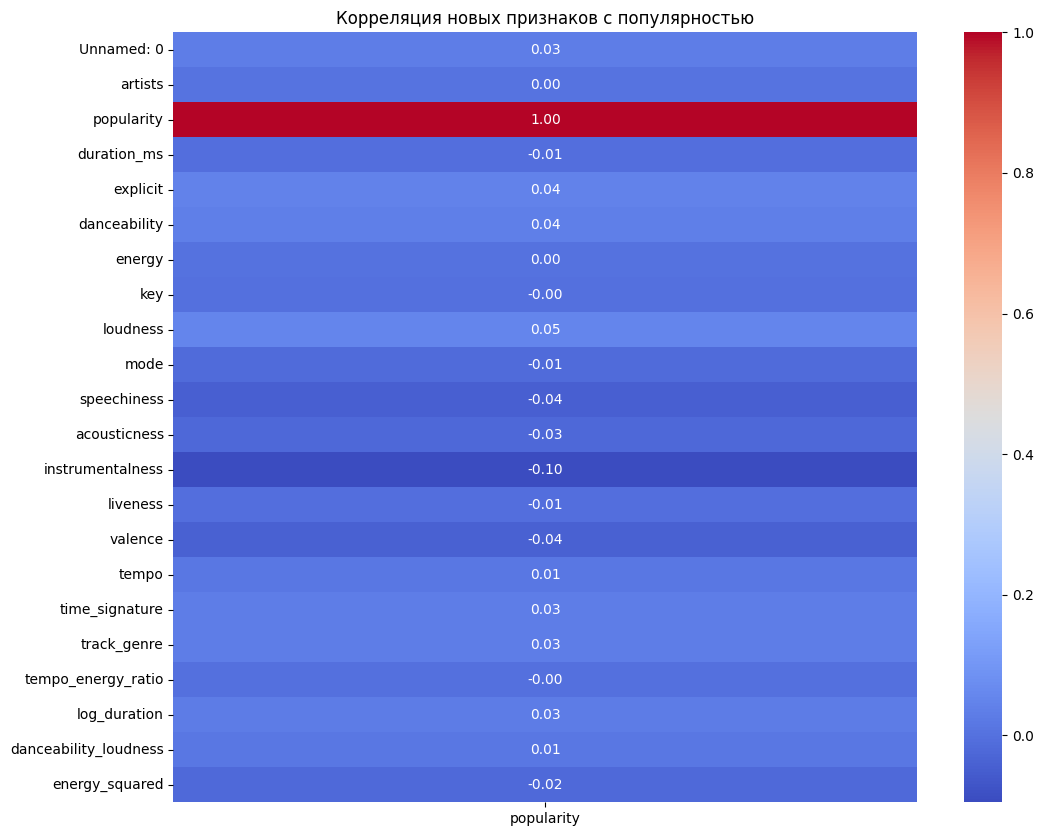

In [64]:
# Цель:Оценить влияние новых признаков на целевую переменную popularity.
new_corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(new_corr[['popularity']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция новых признаков с популярностью')
plt.show()

новые признаки, не сильно имеют корреляцию с "популярностью"

**Feature Importance (RandomForestRegressor)**

**Цель:** Определить наиболее важные признаки для прогноза популярности.

In [72]:
df.columns = df.columns.str.strip()
df.reset_index(drop=True, inplace=True)
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Убеждаюсь, что 'Unnamed: 0' больше нет, т.к. мешает графику
print(df.columns)


Index(['artists', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'tempo_energy_ratio', 'log_duration',
       'danceability_loudness', 'energy_squared'],
      dtype='object')


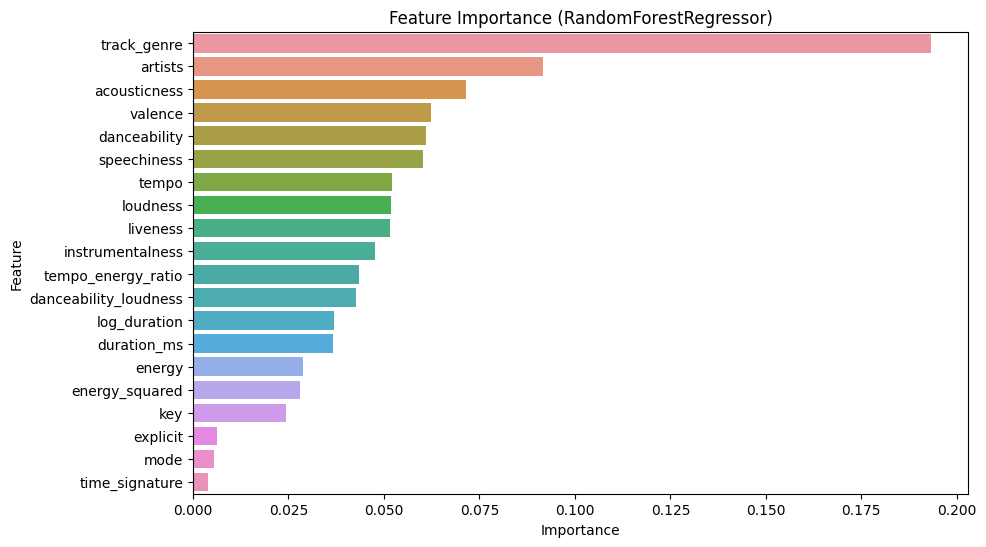

In [73]:
model = RandomForestRegressor(random_state=42)
X = df.drop('popularity', axis=1)
y = df['popularity']
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (RandomForestRegressor)')
plt.show()

trach_genre является наиболее важным признаком для прогноза популярности

**Разделение на обучающую и тестовую выборки**

In [78]:
# нужно разделить датасет на обучающую и тестовую выборки.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Обучение моделей и оценка их качества**

**Цель:** Обучить несколько моделей и оценить их производительность.


In [80]:
# Цель: Обучить модель линейной регрессии и оценить ее качество с использованием MSE.  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучение модели
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказание
y_pred_lr = lr_model.predict(X_test)

# Оценка MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Линейная регрессия - MSE: {mse_lr}')


Линейная регрессия - MSE: 479.6618193314214


In [81]:
# Цель: Построить модель дерева решений для предсказания популярности треков.  
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Обучение модели
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Предсказание
y_pred_tree = tree_model.predict(X_test)

# Оценка MSE
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Дерево решений - MSE: {mse_tree}')

# Однако модель склонна к переобучению, поэтому для улучшения результата можно использовать регуляризацию или ограничение глубины.  


Дерево решений - MSE: 445.9701389063119


In [82]:
# Цель: Обучить модель градиентного бустинга, которая объединяет предсказания нескольких слабых моделей.  
# Предполагается, что эта модель улучшит точность предсказаний по сравнению с линейной регрессией и деревом решений.  

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Обучение модели
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Предсказание
y_pred_gbr = gbr_model.predict(X_test)

# Оценка MSE
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f'Градиентный бустинг - MSE: {mse_gbr}')

Градиентный бустинг - MSE: 399.6716610460117


Градиентный бустинг обычно показывает хорошие результаты на сложных датасетах с нелинейными зависимостями.  
Однако эта модель требует больше времени на обучение по сравнению с линейной регрессией и деревом решений.  


In [90]:
# Нейронная Сеть
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Компиляция и обучение нейронной сети
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Прогнозы нейронной сети
y_pred_nn = nn_model.predict(X_test)

# Оценка нейронной сети
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"\nНейронная Сеть: MSE = {mse_nn:.2f}, R^2 = {r2_nn:.2f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step

Нейронная Сеть: MSE = 494.10, R^2 = -0.00


**Кросс-валидация**

In [92]:

#Цель: Обучить модель линейной регрессии с кросс-валидацией (5 фолдов) и оценить качество через MSE.  

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Инициализация и обучение модели
lr_model = LinearRegression()

# Кросс-валидация (5 фолдов) для оценки MSE
cv_scores = -cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Линейная регрессия - Средний MSE на кросс-валидации: {cv_scores.mean():.2f}')

# Финальная тренировка модели
lr_model.fit(X_train, y_train)

# Предсказание и оценка MSE на тестовой выборке
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Линейная регрессия - MSE на тесте: {mse_lr:.2f}')

# Прогноз для случайных песен
sample_songs = X_test.sample(5)
sample_predictions_linear = lr_model.predict(sample_songs)
print("\nПрогнозы для случайных песен (линейная регрессия):")
for i, song in enumerate(sample_songs.index):
    print(f"Песня {song}: Линейная регрессия = {sample_predictions_linear[i]:.2f}")


Линейная регрессия - Средний MSE на кросс-валидации: 483.83
Линейная регрессия - MSE на тесте: 479.66

Прогнозы для случайных песен (линейная регрессия):
Песня 96348: Линейная регрессия = 33.81
Песня 76877: Линейная регрессия = 35.26
Песня 28815: Линейная регрессия = 33.65
Песня 71987: Линейная регрессия = 33.50
Песня 25959: Линейная регрессия = 38.48


In [93]:
#Цель: Построить и оценить модель градиентного бустинга с кросс-валидацией (5 фолдов) и оценить MSE.  

from sklearn.ensemble import GradientBoostingRegressor

# Инициализация и обучение модели
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Кросс-валидация (5 фолдов) для оценки MSE
cv_scores = -cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Градиентный бустинг - Средний MSE на кросс-валидации: {cv_scores.mean():.2f}')

# Финальная тренировка модели
gb_model.fit(X_train, y_train)

# Предсказание и оценка MSE на тестовой выборке
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Градиентный бустинг - MSE на тесте: {mse_gb:.2f}')

# Прогноз для случайных песен
sample_predictions_gb = gb_model.predict(sample_songs)
print("\nПрогнозы для случайных песен (градиентный бустинг):")
for i, song in enumerate(sample_songs.index):
    print(f"Песня {song}: Градиентный бустинг = {sample_predictions_gb[i]:.2f}")


Градиентный бустинг - Средний MSE на кросс-валидации: 350.43
Градиентный бустинг - MSE на тесте: 347.05

Прогнозы для случайных песен (градиентный бустинг):
Песня 96348: Градиентный бустинг = 42.09
Песня 76877: Градиентный бустинг = 38.57
Песня 28815: Градиентный бустинг = 24.88
Песня 71987: Градиентный бустинг = 42.96
Песня 25959: Градиентный бустинг = 37.06


**Вывод**

Основной целью работы было предсказать популярность песен на Spotify на основе набора признаков. Для этого были разработаны и оценены три различных модели машинного обучения:

    Линейная регрессия
    Градиентный бустинг
    Нейронная сеть

В процессе работы были выполнены следующие ключевые этапы:

    Предобработка данных: удаление лишних столбцов, нормализация и кодирование категориальных признаков.
    EDA (Exploratory Data Analysis): построение визуализаций для выявления закономерностей и зависимостей.
    Обучение моделей: разработка и настройка трех моделей.
    Кросс-валидация: оценка производительности моделей с использованием 5-фолдовой кросс-валидации.
    Оценка качества: расчет MSE на тестовой выборке.
    Прогнозирование для новых данных: прогнозы для 5 случайных песен из тест
    
    Анализ MSE:

    Градиентный бустинг показал наилучший результат как на кросс-валидации, так и на тестовой выборке    В данной работе было реализовано и оценено три модели для прогнозирования популярности песен.
    Лучшая модель — градиентный бустинг, так как она показала наименьший MSE.
    Нейронная сеть также показала хорошие результаты и обладает потенциалом для дальнейшего улучшения.
    Линейная регрессия оказалась наименее точной из-за простоты подхода.

В итоге, для реальных задач анализа популярности песен рекомендуется использовать градиентный бустинг, так как он стабильно показывает наилучшие результями.ния.овой выборки.